In [20]:
import pandas as pd
cesm_data = pd.read_csv('data/cesm_data_variant.csv')

In [9]:
cesm_data['nppWood'].corr(cesm_data['treeFrac'])

0.34678111725833427

In [30]:
cesm_data['grassFrac'].corr(cesm_data['treeFrac'])

0.9999999999999999

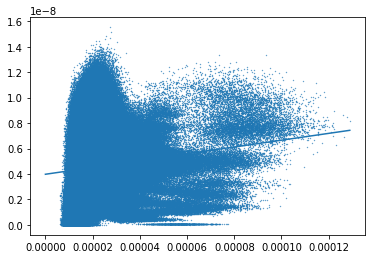

In [207]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
model = LinearRegression()
var = "pr"
var1 = 'nppWood'
model.fit(cesm_data[var].to_numpy().reshape(-1,1), cesm_data[var1].to_numpy().reshape(-1,1))

x_new = np.linspace(0, cesm_data[var].max(), 100)
plt.scatter(cesm_data[var],cesm_data[var1],s=0.1)
y_new = model.predict(x_new[:, np.newaxis])
plt.plot(x_new,y_new)

In [229]:
cesm_data.columns

Index(['# year', 'lat', 'lon', 'rMaint', 'rGrowth', 'nppWood', 'nppRoot',
       'nppLeaf', 'cSoilAbove1m', 'cOther', 'cCwd', 'cVeg', 'cLitter', 'cLeaf',
       'cRoot', 'evspsblsoi', 'lai', 'tsl', 'mrro', 'mrsos', 'grassFrac',
       'shrubFrac', 'cropFrac', 'baresoilFrac', 'residualFrac', 'treeFrac',
       'shrubFrac.1', 'cSoil', 'cStem', 'wetlandFrac', 'ps', 'pr', 'tas_DJF',
       'tas_JJA', 'tas_MAM', 'tas_SON', 'grassCropFrac'],
      dtype='object')

<AxesSubplot:xlabel='mrsos', ylabel='nppWood'>

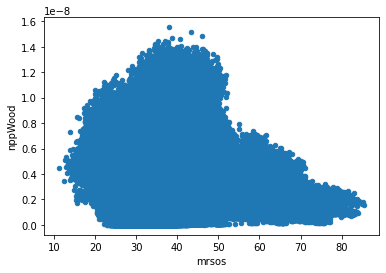

In [196]:
cesm_data.plot.scatter(x='mrsos', y='nppWood')

In [194]:
cesm_data['nppWood'] - cesm_data['nppOther'] 

0         3.212182e-10
1        -6.688872e-12
2         1.037548e-11
3        -1.323736e-09
4         6.279101e-09
              ...     
592510    5.339862e-10
592511   -4.351529e-09
592512    6.382648e-10
592513    1.872955e-10
592514   -1.043087e-09
Length: 592515, dtype: float64

<AxesSubplot:>

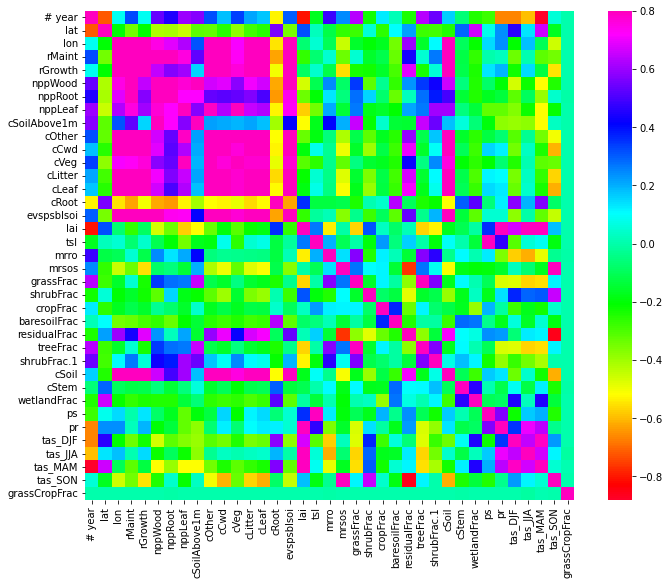

In [40]:
#correlation matrix
corrmat = cesm_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='gist_rainbow')

In [164]:
no_reforest_infer.groupby(['year','lat','lon']).count().reset_index()

,year,lat,lon,Unnamed: 0,cLeaf,cStem,cOther,cSoilAbove1m,agb,area
0,2009.0,42.879582,-81.25,1,1,1,1,1,1,1
1,2009.0,42.879582,-80.00,1,1,1,1,1,1,1
2,2009.0,43.821991,-81.25,1,1,1,1,1,1,1
3,2009.0,43.821991,-80.00,1,1,1,1,1,1,1
4,2009.0,43.821991,-65.00,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
3069,2014.0,67.382202,-126.25,1,1,1,1,1,1,1
3070,2014.0,67.382202,-125.00,1,1,1,1,1,1,1
3071,2014.0,68.324608,-136.25,1,1,1,1,1,1,1
3072,2014.0,68.324608,-135.00,1,1,1,1,1,1,1


In [173]:
no_reforest_infer[no_reforest_infer['lat']==68.324608]

,Unnamed: 0,cLeaf,cStem,cOther,cSoilAbove1m,year,lat,lon,agb,area
3054,3054,0.059537,1.401029,0.759839,13.786208,2009.0,68.324608,-136.25,11.780972,5.305774e+09
3055,3055,0.057572,1.374086,0.754138,13.803032,2010.0,68.324608,-136.25,11.597341,5.305774e+09
3056,3056,0.059622,1.396796,0.757101,13.863434,2011.0,68.324608,-136.25,11.744432,5.305774e+09
3057,3057,0.058971,1.379950,0.754966,13.863031,2012.0,68.324608,-136.25,11.640267,5.305774e+09
3058,3058,0.059079,1.389511,0.753783,13.860473,2013.0,68.324608,-136.25,11.685299,5.305774e+09
3059,3059,0.059409,1.398317,0.756440,13.827623,2014.0,68.324608,-136.25,11.747864,5.305774e+09
3060,3060,0.074507,2.143666,0.581351,43.904743,2009.0,68.324608,-135.00,14.853646,5.305774e+09
3061,3061,0.073826,2.156258,0.581985,43.830875,2010.0,68.324608,-135.00,14.920203,5.305774e+09
3062,3062,0.074637,2.171423,0.586657,43.886898,2011.0,68.324608,-135.00,15.029761,5.305774e+09
3063,3063,0.074976,2.141285,0.582099,43.891220,2012.0,68.324608,-135.00,14.847468,5.305774e+09


In [172]:
cesm_data[29::30][cesm_data['lat']==68.3246078]

/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_50469/4273234168.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cesm_data[29::30][cesm_data['lat']==68.3246078]


,evspsblsoi,tsl,ps,pr,mrro,mrsos,grassCropFrac,wetlandFrac,baresoilFrac,residualFrac,...,tas_MAM,tas_JJA,tas_SON,cLeaf,cStem,cOther,cSoilAbove1m,# year,lat,lon
91649,0.000002,273.736973,98034.929688,0.000014,0.000006,49.920460,35.013618,6.897001,3.383037,1.999998,...,266.849357,282.369816,269.530369,0.056401,1.197999,0.798438,12.874927,2009.0,68.324608,-136.25
91679,0.000002,273.924944,98094.234375,0.000013,0.000006,51.417781,35.013618,6.911006,3.383037,1.999998,...,265.438729,283.344033,269.569271,0.054030,1.200185,0.805214,12.874426,2010.0,68.324608,-136.25
91709,0.000002,273.919185,97954.208705,0.000014,0.000006,50.441631,35.013618,6.911787,3.383037,1.999998,...,266.804077,282.339491,269.239934,0.054143,1.202944,0.795476,12.878679,2011.0,68.324608,-136.25
91739,0.000002,273.562225,97980.191964,0.000014,0.000006,50.654062,35.013618,6.916520,3.383037,1.999998,...,265.992807,282.444911,268.241625,0.054197,1.205450,0.792206,12.882667,2012.0,68.324608,-136.25
91769,0.000002,274.156132,97883.960938,0.000015,0.000007,51.799254,35.013618,6.913067,3.383037,1.999998,...,266.641828,282.656429,268.840925,0.056021,1.207951,0.793111,12.884986,2013.0,68.324608,-136.25
91799,0.000002,274.298362,97920.040179,0.000014,0.000008,50.852047,35.013618,6.914736,3.383037,1.999998,...,266.831552,283.451224,270.302682,0.055796,1.210170,0.814540,12.885479,2014.0,68.324608,-136.25
91829,0.000003,271.464722,98902.558036,0.000013,0.000005,70.537926,49.104954,49.895324,2.163562,11.000001,...,266.457838,282.919285,270.060547,0.083141,1.869216,0.564775,43.907319,2009.0,68.324608,-135.00
91859,0.000003,271.721187,98965.504464,0.000012,0.000005,70.244453,49.104954,49.874861,2.163562,11.000001,...,265.193080,283.963601,270.163417,0.083084,1.876738,0.573809,43.898831,2010.0,68.324608,-135.00
91889,0.000003,271.724561,98823.193080,0.000012,0.000005,69.776316,49.104954,49.995445,2.163562,11.000001,...,266.469408,282.802617,269.790837,0.083262,1.884439,0.568901,43.889472,2011.0,68.324608,-135.00
91919,0.000003,271.290013,98849.806920,0.000013,0.000005,70.629992,49.104954,49.708284,2.163562,11.000001,...,265.634766,282.928266,268.787702,0.083376,1.891801,0.565033,43.882567,2012.0,68.324608,-135.00


In [165]:
cesm_data[29::30].groupby(['# year','lat','lon']).count().reset_index()

,# year,lat,lon,evspsblsoi,tsl,ps,pr,mrro,mrsos,grassCropFrac,...,residualFrac,treeFrac,tas_DJF,tas_MAM,tas_JJA,tas_SON,cLeaf,cStem,cOther,cSoilAbove1m
0,2009.0,42.879582,-81.25,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2009.0,42.879582,-80.00,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2009.0,43.821991,-81.25,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2009.0,43.821991,-80.00,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2009.0,43.821991,-65.00,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,2014.0,67.382202,-125.00,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3074,2014.0,68.324608,-136.25,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3075,2014.0,68.324608,-135.00,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3076,2014.0,68.324608,-133.75,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [170]:
cesm_data.lat.unique()

array([42.8795815, 43.821991 , 44.7643967, 45.7068062, 46.6492157,
       47.5916214, 48.5340309, 49.4764404, 50.4188499, 51.3612556,
       52.3036652, 53.2460747, 54.1884804, 55.1308899, 56.0732994,
       57.0157051, 57.9581146, 58.9005241, 59.8429337, 60.7853394,
       61.7277489, 62.6701584, 63.6125641, 64.5549774, 65.4973831,
       66.4397888, 67.3822021, 68.3246078])

In [157]:
cesm_data.groupb

AttributeError: 'DataFrame' object has no attribute 'year'

In [129]:
cesm_data = pd.read_csv('data/timeseries_cesm_hold_out_data_30.csv')


In [107]:
cesm_data.rename(columns={'# year':'year'},inplace=True)

# cesm_data = cesm_data[cfg.model.input + cfg.model.output + cfg.model.id]



# cesm_data = cesm_data[cesm_data['year'] == 2014]
# reforested_input = pd.read_csv('data/observed_reforest_ts.csv')
# cesm_data = cesm_data.where(cesm_data['year'] > 1980).dropna()
cesm_data['lat'] = round(cesm_data['lat'],6)
#get only columns with fin_year of 2014
x = cesm_data['year'][29::30].reset_index()
x['index'] = x['index'] - 29
x.set_index('index',inplace=True)
t = x.loc[x.index.repeat(30)].reset_index()
cesm_data['fin_year'] = t['year']

In [113]:
cesm_data = pd.read_csv('data/timeseries_cesm_hold_out_data_30.csv')


In [117]:
# cesm_data.groupby('# year').count()
#get only columns with fin_year of 2014
x = cesm_data['# year'][29::30].reset_index()
x['index'] = x['index'] - 29
x.set_index('index',inplace=True)
t = x.loc[x.index.repeat(30)].reset_index()
cesm_data['fin_year'] = t['# year']
# cesm_data = cesm_data[cesm_data['fin_year'] > 1984]
# cesm_data = cesm_data.groupby(['year','lat','lon']).mean().reset_index()


In [128]:
cesm_data[29::30].groupby(['# year','lat','lon']).sum().reset_index()

,# year,lat,lon,evspsblsoi,tsl,ps,pr,mrro,mrsos,grassCropFrac,...,treeFrac,tas_DJF,tas_MAM,tas_JJA,tas_SON,cLeaf,cStem,cOther,cSoilAbove1m,fin_year
0,2009.0,42.879582,-81.25,0.000010,285.471680,98872.511161,0.000030,0.000011,32.945835,62.525440,...,2.204544,271.161961,280.380820,296.931497,287.879822,0.031780,0.175325,0.137524,8.266409,2009.0
1,2009.0,42.879582,-80.00,0.000016,285.175576,98515.247768,0.000032,0.000009,33.035416,38.516844,...,5.926304,271.217215,279.875083,296.548165,287.574938,0.034220,0.470184,0.199183,5.841710,2009.0
2,2009.0,43.821991,-81.25,0.000008,284.388057,98738.246652,0.000029,0.000010,32.059671,71.886246,...,4.815629,270.118129,278.833056,295.844060,286.931562,0.034141,0.361256,0.168823,10.439492,2009.0
3,2009.0,43.821991,-80.00,0.000006,284.088771,98641.125000,0.000031,0.000013,32.040395,77.029795,...,9.933722,270.181915,279.080497,295.618151,286.607287,0.043428,0.555090,0.203676,11.578171,2009.0
4,2009.0,43.821991,-65.00,0.000005,285.012804,101127.494420,0.000049,0.000027,32.991374,2.650999,...,91.349007,277.674290,281.326368,294.453047,289.223088,0.310034,11.024187,0.331560,8.058161,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,2014.0,67.382202,-125.00,0.000004,271.264369,97604.547991,0.000012,0.000005,73.859472,47.604198,...,13.462174,252.137599,266.102979,284.873422,271.470956,0.069630,1.495583,0.614900,39.734046,2014.0
3074,2014.0,68.324608,-136.25,0.000002,274.298362,97920.040179,0.000014,0.000008,50.852047,35.013618,...,1.694104,252.841736,266.831552,283.451224,270.302682,0.055796,1.210170,0.814540,12.885479,2014.0
3075,2014.0,68.324608,-135.00,0.000004,272.402740,98787.254464,0.000013,0.000007,70.399748,49.104954,...,22.774076,252.958167,266.684823,284.061423,270.898464,0.085077,1.907621,0.583064,43.863378,2014.0
3076,2014.0,68.324608,-133.75,0.000003,272.941738,99396.333705,0.000013,0.000005,65.028639,39.065060,...,18.289152,252.765490,267.081748,284.297638,270.945927,0.089101,2.260648,0.715722,33.714613,2014.0


In [184]:
observed_input = pd.read_csv('data/cleaned_observed_ann_input.csv')


In [185]:
observed_input.lat.unique()

array([43.821991, 44.764397, 45.706806, 46.649216, 47.591621, 48.534031,
       49.47644 , 50.41885 , 51.361256, 52.303665, 53.246075, 54.18848 ,
       55.13089 , 56.073299, 57.015705, 57.958115, 58.900524, 59.842934,
       60.785339, 61.727749, 62.670158, 63.612564, 64.554977, 65.497383,
       66.439789, 67.382202, 68.324608])

In [186]:
cesm_data = cesm_data[cesm_data.lat != 42.879582]

round(cesm_data.lat,6).unique() == observed_input.lat.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [194]:
cesm_data.loc[:,['tsl','ps']] = 100

In [23]:
import pandas as pd
data = pd.read_csv(f'data/cesm_data_variant.csv')
cols = data.columns.append(pd.Index(['variant']))
data = data.reset_index()
data.columns = cols

In [26]:
# from preprocessing.utils import scaleVariable

# cesm_df["cVeg"] = scaleVariable(cesm_df["cVeg"])
# cesm_df["nppWood"] = scaleVariable(cesm_df["nppWood"])

cesm_df = data[data['# year'] > 1984]


In [31]:
from preprocessing.utils import getArea
def scaleVariable(df:pd.Series,variable:str):
    #convert kg/m2 to megatonnes C
    if(variable in ["nppWood","nppLeaf","nppRoot"]):
        df.loc[:,variable] = df[variable] * 60 * 60 * 24 * 365 
    area = df.apply(lambda x: getArea(x['lat'],x['lon']),axis=1)
    return df[variable] * area / 1e9 #to megatonnes

cesm_df.loc[:,"nppWood"] = scaleVariable(cesm_df,"nppWood")
cesm_df.loc[:,"nppLeaf"] = scaleVariable(cesm_df,"nppLeaf")
cesm_df.loc[:,"nppRoot"] = scaleVariable(cesm_df,"nppRoot")
cesm_df.loc[:,"cVeg"] = scaleVariable(cesm_df,"cVeg")

/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_10628/2599640264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,variable] = df[variable] * 60 * 60 * 24 * 365 # last term is from scaling during training
/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_10628/2599640264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cesm_df.loc[:,"nppWood"] = scaleVariable(cesm_df,"nppWood")
/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_10628/2599640264.py:5: SettingWithCopy

In [32]:
cesm_df.groupby("# year").sum()[["nppWood","cVeg","nppLeaf","nppRoot"]]

,nppWood,cVeg,nppLeaf,nppRoot
# year,,,,
1985.0,4.742509e+33,211441.130271,2664.415540,3346.504658
1986.0,4.739524e+33,211647.358708,2679.035275,3342.072087
1987.0,4.831212e+33,211962.091081,2690.589065,3382.606285
1988.0,4.828936e+33,212281.207419,2740.213223,3439.238839
1989.0,4.814511e+33,212397.411226,2719.720356,3390.272830
1990.0,4.852745e+33,212612.037546,2760.585158,3454.185939
1991.0,4.892709e+33,212856.856524,2726.974757,3401.808369
1992.0,4.934540e+33,213265.336868,2756.889016,3414.033043
1993.0,4.914293e+33,213614.481275,2761.895923,3423.667074


In [24]:
cols = cesm_data.columns.append(pd.Index(['variant']))
cesm_data = cesm_data.reset_index()
cesm_data.columns = cols

In [169]:

temp = cesm_data[cesm_data['# year'] > 1984]
temp = temp[['treeFrac','lat','lon']]


In [36]:
4416930 / 30 / 19

7749.0

In [170]:
mask = temp['treeFrac'] < 5
temp.loc[mask,'treeFrac'] = np.nan

In [171]:
temp['treeFrac']

69255           NaN
69256      6.052879
69257      5.925084
69258     10.471601
69259     91.321022
            ...    
592510    13.462174
592511          NaN
592512    22.774076
592513    18.289152
592514     7.790319
Name: treeFrac, Length: 107730, dtype: float64

In [172]:
test = temp.to_numpy().reshape(-1,30,3)

In [173]:
test.shape
np.set_printoptions(threshold=np.inf)
test[0:100]

array([[[          nan,   42.8795815 ,  -81.25      ],
        [   6.05287886,   42.8795815 ,  -80.        ],
        [   5.92508364,   43.821991  ,  -81.25      ],
        [  10.47160053,   43.821991  ,  -80.        ],
        [  91.32102203,   43.821991  ,  -65.        ],
        [  10.51055336,   44.7643967 ,  -81.25      ],
        [  22.09985542,   44.7643967 ,  -80.        ],
        [  59.97657776,   44.7643967 ,  -78.75      ],
        [  75.35864258,   44.7643967 ,  -77.5       ],
        [  47.40211868,   44.7643967 ,  -76.25      ],
        [  82.95264435,   44.7643967 ,  -65.        ],
        [  85.3514328 ,   44.7643967 ,  -63.75      ],
        [  74.96820068,   45.7068062 ,  -80.        ],
        [  91.751091  ,   45.7068062 ,  -78.75      ],
        [  84.4008255 ,   45.7068062 ,  -77.5       ],
        [  62.93914413,   45.7068062 ,  -76.25      ],
        [  56.49248886,   45.7068062 ,  -75.        ],
        [  31.05378151,   45.7068062 ,  -73.75      ],
        [ 

In [174]:
test.shape

(3591, 30, 3)

In [184]:
test[~np.isnan(test).any(axis=(1,2))].shape

(1666, 30, 3)

In [133]:
for i in range(7749):
    print(np.isnan(test[i,:,:]).any(axis=1))

[False False False False False False False False False False  True False
 False False False False False False False False False False False  True
 False  True False False False  True]
[False  True False False False False False False False False False False
 False False  True False  True False  True False False False False  True
 False  True False  True False  True]
[False False False False  True False  True False  True False  True False
  True False False False False False False False False  True False  True
 False False False  True False  True]
[False False  True False False False  True False  True False  True False
  True False False  True False  True False  True False  True False  True
 False  True False False False False]
[False False  True False False False False False  True False  True False
 False False False False False  True False  True False  True False  True
 False False  True False False False]
[ True False  True False False False  True False False False False False
 False 

In [60]:
x.reshape(-1,30,19)

ValueError: cannot reshape array of size 4345580 into shape (30,19)

In [225]:
#VERIFY TS AND NON-TS REFORESTATION DS ARE THE SAME
ts_reforested = pd.read_csv(f'data/observed_reforest_ts.csv')
observed_data =pd.read_csv(f'data/total_reforestation.csv')
observed_data[(observed_data['lat'] == 43.821991) & (observed_data['lon'] == -80.000000)][['treeFrac','year']]
pd.set_option('display.max_rows', None)
ts_reforested[29::30][['treeFrac','year_x','lat','lon']]

In [53]:
import pandas as pd
lstm_obsv = pd.read_csv('data/forest_carbon_observed_lstm.csv')
final_input = pd.read_csv(f'data/observed_timeseries30_data.csv')
cesm_data = pd.read_csv(f'data/cesm_data.csv')[['evspsblsoi','lai','tsl','mrro','mrsos','grassFrac','shrubFrac','cropFrac','baresoilFrac','residualFrac','treeFrac','shrubFrac','cSoil','cStem','wetlandFrac','ps','pr']]

In [56]:
lstm_obsv.groupby('year').count()

,Unnamed: 0,cSoilAbove1m,lat,lon
year,,,,
2013.0,479,479,479,479
2014.0,479,479,479,479
2015.0,479,479,479,479
2016.0,479,479,479,479
2017.0,479,479,479,479
2018.0,479,479,479,479
2019.0,479,479,479,479


In [57]:
final_input[29::30].describe()

,evspsblsoi,tsl,ps,pr,mrro,mrsos,grassCropFrac,wetlandFrac,baresoilFrac,residualFrac,treeFrac,tas_DJF,tas_MAM,tas_JJA,tas_SON,year,lat,lon
count,3.577000e+03,3577.000000,3577.000000,3.577000e+03,3.577000e+03,3577.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.00000,3577.000000,3577.000000
mean,2.243873e-07,275.167935,93059.282163,8.385182e-07,4.110303e-07,32.739365,7.120501,6.939459,4.816869,12.496067,59.481558,256.902305,270.348046,285.393701,272.613799,2016.00000,54.098114,-105.971135
std,9.752230e-08,27.460662,10514.997123,4.961742e-07,4.976527e-07,11.869392,13.642732,10.232778,6.711486,14.379432,19.522449,26.063159,27.117984,28.536569,27.396322,2.00028,5.396035,21.515116
min,-0.000000e+00,0.000000,0.000000,0.000000e+00,-2.833182e-12,0.000000,0.000432,0.010358,0.012654,0.148314,3.980061,0.000000,0.000000,0.000000,0.000000,2013.00000,43.821991,-140.000000
25%,1.546010e-07,276.495789,90399.656250,5.209205e-07,6.165642e-08,24.354434,0.747030,0.803928,0.630125,3.397339,48.127218,256.056671,270.967377,286.262054,272.589478,2014.00000,49.476440,-123.750000
50%,2.222381e-07,278.234680,95463.593750,6.995000e-07,2.585890e-07,30.754963,2.652038,2.167574,1.866955,7.648472,62.343671,259.331268,273.259430,288.990326,275.638214,2016.00000,53.246075,-112.500000
75%,2.944596e-07,279.397736,97812.437500,1.074304e-06,6.128471e-07,36.570275,6.315800,7.966590,6.427251,15.436954,75.806213,262.909363,275.466461,290.314911,278.034760,2018.00000,57.958115,-91.250000
max,4.942472e-07,283.507721,101335.539062,4.082073e-06,3.902351e-06,66.824561,86.381303,54.426529,50.682449,89.346437,92.772187,277.001190,282.235748,294.497009,286.050140,2019.00000,68.324608,-53.750000


In [58]:
cesm_data.describe()

,evspsblsoi,lai,tsl,mrro,mrsos,grassFrac,shrubFrac,cropFrac,baresoilFrac,residualFrac,treeFrac,shrubFrac,cSoil,cStem,wetlandFrac,ps,pr
count,8.464500e+04,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000,84645.000000
mean,4.411622e-06,2.020804,277.233190,0.000012,38.470952,22.159190,3.387273,5.490369,1.590649,7.592953,59.779566,3.387273,19.291042,4.898720,7.305912,94069.096898,0.000024
std,2.504155e-06,1.106464,2.690592,0.000014,9.650661,19.868435,7.728721,15.073978,3.715302,10.761972,29.276464,7.728721,33.699523,3.385726,11.321015,4479.589222,0.000014
min,4.303009e-07,0.001604,265.432159,-0.000012,14.096793,0.129558,0.000000,0.000000,0.000000,-0.000007,0.702901,0.000000,0.053865,0.000000,0.000000,82059.117188,0.000006
25%,2.503653e-06,1.106577,275.560150,0.000002,32.059124,6.454757,0.000000,0.000000,0.004971,1.000005,37.657017,0.000000,5.626539,2.156775,0.000000,90188.445312,0.000014
50%,3.880945e-06,1.997457,277.258026,0.000007,36.822254,17.154797,0.026499,0.110039,0.046872,4.000001,67.527451,0.026499,10.559494,4.766553,0.785519,95567.148438,0.000020
75%,5.691652e-06,2.828753,279.001099,0.000016,42.627460,32.206997,2.589293,1.266434,1.110659,9.000001,84.618454,2.589293,21.798002,7.275269,10.956615,97726.273438,0.000029
max,2.124341e-05,5.363956,287.439667,0.000104,84.766464,97.845039,57.909237,93.557739,33.013645,77.000000,98.373634,57.909237,311.560242,13.589405,57.115070,101442.804688,0.000112


In [23]:
#FEATURE SELECTION?

cesm_data = pd.read_csv('data/cesm_data_variant.csv')

In [25]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
names = ['evspsblsoi','lai','tsl','mrro','mrsos','grassFrac','shrubFrac','cropFrac','baresoilFrac','residualFrac','treeFrac','shrubFrac','wetlandFrac','ps','pr','tas_DJF', 'tas_MAM', 'tas_JJA', 'tas_SON']
output = ['cSoilAbove1m']
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
cesm_data = cesm_data[names + output]
array = cesm_data.values
X = array[:,0:len(names)]
Y = array[:,-1]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[1.509 1.452 1.18  1.508 1.759 3.547 1.627 1.595 1.351 1.594 3.547 1.627
 1.035 1.136 1.192 1.414 1.41  1.378 1.641]
[[22.159  0.     0.    29.421]
 [20.168  0.     0.    24.893]
 [27.027  0.     0.    34.627]
 [42.992  0.     0.    53.21 ]
 [ 2.346  0.     0.     2.654]]


In [27]:

# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
#dataframe = read_csv(url, names=names)
array = cesm_data.values
X = array[:,0:len(names)]
Y = array[:,-1]
# feature extraction
model = ExtraTreesClassifier(n_estimators=len(names))
model.fit(X, Y)
print(model.feature_importances_)

ValueError: Unknown label type: 'continuous'

In [47]:
import pandas as pd
from hydra import initialize, compose
import torch as T
from lstm_model import RegressionLSTM
with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config",overrides=['model=lstm'])


model = RegressionLSTM(num_sensors=len(cfg.model.input), hidden_units=cfg.model.hidden_units,cfg=cfg)
checkpoint = T.load(f'{cfg.project}/checkpoint/lstm_checkpoint_sleek-cherry-20.pt')

In [51]:
checkpoint['model_state_dict']
# for keys in checkpoint['model_state_dict'].keys():
#     checkpoint['model_state_dict'][keys] = checkpoint['model_state_dict'][keys].replace('module.','')



In [65]:
reforested_input = pd.read_csv(f'{cfg.data}/observed_reforest_ts.csv')


In [93]:
era = pd.read_csv('data/era_data.csv')

In [94]:
era.dropna(how='any',inplace=True)

In [95]:
era['tp'] 

47       1.125095e-06
48       1.010495e-06
117      1.136829e-06
118      9.246740e-07
130      1.346158e-06
             ...     
70432    2.871815e-07
70493    5.079018e-07
70494    3.387433e-07
70495    3.119343e-07
70499    2.606299e-07
Name: tp, Length: 18504, dtype: float64

In [89]:
cesm_data['pr']

0        0.000021
1        0.000022
2        0.000020
3        0.000020
4        0.000041
           ...   
84640    0.000012
84641    0.000016
84642    0.000015
84643    0.000014
84644    0.000012
Name: pr, Length: 84645, dtype: float64

In [66]:
observed_lstm = pd.read_csv('data/forest_carbon_observed_lstm.csv')

In [64]:
reforested_input[reforested_input['treeFrac'].isna()]['lat']

0        43.821991
1        43.821991
2        43.821991
3        43.821991
4        43.821991
           ...    
47455    52.303665
47456    52.303665
47457    52.303665
47458    52.303665
47459    52.303665
Name: lat, Length: 6720, dtype: float64

In [68]:
observed_lstm.year

0       2013.0
1       2014.0
2       2015.0
3       2016.0
4       2017.0
         ...  
3348    2015.0
3349    2016.0
3350    2017.0
3351    2018.0
3352    2019.0
Name: year, Length: 3353, dtype: float64

In [97]:
x = pd.read_csv('data/cesm_data_variant.csv')

In [98]:
len(x)

592515